## R-command for large samples
**Problem:** Test the hypothesis H 0 : μ = 10 against H 1 : μ ≠ 10. A random sample of size
400 is drawn gives mean 10.2 and standard deviation 2.25. Use LOS = 5%.

This is large sample test problem. Decision about acceptance or rejection of null hypothesis can be taken using p-value. 

If p-value is less than LOS then reject null hypothesis.

In [165]:
n=400; mean=10.2; sd=2.25; m0=10

In [166]:
zcal = (mean-m0)/(sd/sqrt(n))
zcal

[1] 1.777778

In [167]:
pvalue = 2*(1-pnorm(abs(zcal))) 
pvalue = 2*pnorm(abs(zcal), lower.tail=F)
pvalue

[1] 0.07544036

Conclusion: Since p-value > LOS, therefore do not reject H 0 at 5% LOS.

##### Problem: Test the hypothesis H 0 : μ ≥ 50 against H 1 : μ < 50. A random sample of size 65 is drawn gives mean 47.8 and standard deviation 10. Use LOS = 5%.

In [168]:
n=65;mean=47.8;sd=10;m0=50

In [169]:
zcal = (mean-m0)/(sd/sqrt(n))
zcal

[1] -1.773697

In [170]:
pvalue = pnorm(zcal)
pvalue

[1] 0.03805667

##### Conclusion: Since p-value < LOS, therefore reject H 0 at 5% LOS.

###### Problem: Two random samples of sizes 1000 and 2000 are drawn from two populations with same standard deviation 2.5 gives means 67.5 and 68 respectively. Test the hypothesis H 0 : μ 1 = μ 2 against H 1 : μ 1 ≠ μ 2 . Use 5% LOS.

In [171]:
n1=1000; n2=2000; xbar1 = 67.5; xbar2 = 68; s1 = 2.5; s2 = 2.5

In [172]:
zcal = (xbar1 - xbar2)/sqrt(s1^2/n1 + s2^2/n2)
zcal

[1] -5.163978

In [173]:
pvalue = 2*(1-pnorm(abs(zcal)))
pvalue

[1] 2.417564e-07

##### Conclusion: Since p-value < LOS, therefore reject H 0 at 5% LOS.

###### Problem: Experience has shown that 20% of a manufactured product is of the top quality. In one day’s production of 400 articles only 50 are of top quality. Test the hypothesis that experience of 20% is wrong.
H 0 : P = 0.20 against H 1 : P≠ 0.20   n =400<br>
Sample proportion p = 50/400 = 0.125   α =0.05


In [174]:
n=400; p = 0.125; P = 0.20

In [175]:
zcal = (p - P)/sqrt(P*(1-P)/n)
zcal

[1] -3.75

In [176]:
pvalue = 2*(1-pnorm(abs(zcal)))
pvalue

[1] 0.0001768346

###### Conclusion: Since p-value < LOS, therefore reject H 0 at 5% LOS.

###### Problem: From each of two consignments of apples, a sample of size 200 is drawn, and number of rotten apples counted. Test whether the proportion of rotten apples in the two consignments are significantly different?

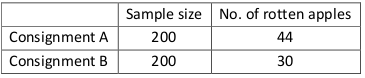
n1 = 200,<br>
p1 = 44/200,<br>
H 0 : P 1 = P 2 against H 1 : P 1 ≠ P 2<br>
n2 = 200,<br>
p2 = 30/200, α = 0.05

In [177]:
n1=200; p1 = 44/200; n2 = 200; p2 = 30/200

In [178]:
p = ((n1 * p1) + (n2 * p2))/(n1 + n2)

In [179]:
q=1-p

In [180]:
p;q

[1] 0.185

[1] 0.815

In [181]:
se = sqrt(p*q*(1/n1 + 1/n2))
se

[1] 0.03882976

In [182]:
zcal = (p1 - p2)/se
zcal

[1] 1.802741

In [183]:
pvalue = 2*(1-pnorm(abs(zcal)))
pvalue

[1] 0.07142888

###### Conclusion: Since p-value > LOS, therefore do not reject H 0 at 5% LOS.

#### R-command for small samples
##### To test single population mean:
- Check normality of two populations using Shapiro-Wilk normality test or Q-Q plot.
- t.test(x, mu, alt, conf.level)

Where

- **x:** vector of observations
- **mu:** specified value of true mean i.e. μ 0
- **alt:** alternative hypothesis with three options alt = “less”,alt = “greater”and by default alt = “two-sided”
- **conf.level:** confidence coefficient (1 - α). Default option is 0.95

#### Analytical methods of checking assumption of normality of parent population:
If the sample size is small, Q-Q plot or boxplot fails to judge about normality of parent population. 

For small sample size, an analytical test, known as Shapiro-Wilk test is designed to check normality of population. The R-command to test normality of population is

**shapiro.test(x)  where x: vector of observations**

This command returns value of test-statistic W and p-value of test statistic.

H 0 : population is normally distributed.

Thus if the p-value < α, then the null hypothesis is rejected and there is evidence that the data tested are not from a normally distributed population. In other words, the data are
not normal.

On the contrary, if the p-value > α, then the null hypothesis that the data came from a normally distributed population cannot be rejected. 

However, since the test is biased by sample size, the test may be statistically significant from a normal distribution in any large samples. Thus a Q–Q plot is required for verification in addition to the test.



**Problem:** Write R-command, for the following data to test the hypothesis Ho : μ = 3400 against H1 : μ < 3400 at 5% LOS.
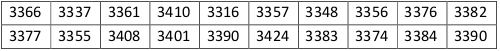

For applying t-test, basic assumption is, sample is drawn from normal population.
> qqnorm(x)

> qqline(x)

For small sample, it is not possible to judge about normality of parent population using
Q-Q plot. Therefore we use Shapiro-Wilk test as follows

In [184]:
x<- c(3366, 3337, 3361, 3410, 3316, 3357, 3348, 3356, 3376, 3382, 3377, 3355, 3408,
3401, 3390, 3424, 3383, 3374, 3484, 3390)

In [185]:
shapiro.test(x)


	Shapiro-Wilk normality test

data:  x
W = 0.93317, p-value = 0.1777


Since p-value > α, 

Therefore the null hypothesis that the data came from a normally distributed population cannot be rejected. Hence we can apply t-test for testing population
mean.
>H0 : μ = 3400

>H1 : μ < 3400

In [186]:
t.test(x, mu=3400, alt="less")


	One Sample t-test

data:  x
t = -2.5268, df = 19, p-value = 0.01027
alternative hypothesis: true mean is less than 3400
95 percent confidence interval:
     -Inf 3393.607
sample estimates:
mean of x 
  3379.75 


**Interpretation:**

t cal = -2.5268,<br>
degrees of freedom = 19,<br>
p-value = 0.01027<br>
Since p-value < α (0.05),<br>

Therefore decision is to reject H o at 5% level of significance.
>95% C.I = (-∞, 3393.607)

**Note: Since alternative hypothesis is one sided, lower limit of the class interval is - ∞ .**

>Point estimate = x ത = 3379.5

Decision about acceptance or rejection of null hypothesis can be taken on the basis of confidence interval also. 

In the above example μ 0 = 3400 lies outside the 95% C.I., hence H0 is rejected at 5% level of significance.

###### Problem: The following data refer to the amount of coffee (in ounces) filled by a machine in six randomly picked jars: 15.7, 15.9, 16.3, 16.2, 15.7 and 15.9. Is the true mean amount of coffee in a jar is 16 ounces? Use LOS 5%.

>H0 : μ = 16

>H1 : μ ≠ 16

Since sample size n = 6 is small, <br>we have to use t-test, which is based on the normality of parent population. 

Therefore first we have to use Shapiro-Wilk normality test.

In [187]:
x <- c(15.7, 15.9, 16.3, 16.2, 15.7, 15.9)
x

[1] 15.7 15.9 16.3 16.2 15.7 15.9

In [188]:
shapiro.test(x)


	Shapiro-Wilk normality test

data:  x
W = 0.8788, p-value = 0.2636


Since p-value > α, 

Therefore the null hypothesis that the data came from a normally distributed population cannot be rejected. 

Hence we can apply t-test for testing population mean.

In [189]:
t.test(x, mu=16)


	One Sample t-test

data:  x
t = -0.48795, df = 5, p-value = 0.6462
alternative hypothesis: true mean is not equal to 16
95 percent confidence interval:
 15.68659 16.21341
sample estimates:
mean of x 
    15.95 


Interpretation:
>t cal = -0.488,

>degrees of freedom = 5,

>p-value = 0.6462

Since p-value > α (0.05), 

Therefore decision is, do not reject Ho at 5% level of
significance.
>95% C.I = (15.68659 16.21341)

>Point estimate = x bar = 15.95

Decision about acceptance or rejection of null hypothesis can be taken on the basis of confidence interval also. 

In the above example μ 0 = 16 lies within the 95% C.I., 

hence H0 is accepted at 5% level of significance.

### To test equality of two population means for two independent normal populations with equal variances:

- Check normality of two populations using Shapiro-Wilk normality test or Q-Q plot.
- Check for equality of variances using F-test for which R-command is var.test(x, y, ratio = 1, alternative = c("two.sided", "less", "greater"), conf.level = 0.95)

Where
x , y: numeric vectors of data values

**ratio:** the hypothesized ratio of the population variances of x and y

**alternative:** a character string specifying the alternative hypothesis, must be one of "two.sided" (default), "greater" or "less". 
You can specify just the initial letter

**conf.level:** confidence level

- t.test(x, y, alt = ”less or greater”, var.equal = T)
    Default value of alt is two.sided and var.equal is F.

###### Problem: Below are given the gain in weights (in lbs) of pigs fed on two diets A and B
**Gain in weight**

Diet A:
**25, 32, 30, 43, 24, 14, 32, 24, 31, 31, 35, 25**

Diet B:
**44, 34, 22, 10, 47, 31, 40, 30, 32, 35, 18, 21, 35, 29, 22**

Test, if the two diets differ significantly as regards their effect on increase in weight. 

Use LOS 5%.

In [190]:
x <- c(25,32,30,34,24,14,32,24,30,31,35,25)
y <- c(44,34,22,10,47,31,40,30,32,35,18,21,35,29,22)

In [191]:
shapiro.test(x)


	Shapiro-Wilk normality test

data:  x
W = 0.88753, p-value = 0.1095


**Conclusion1:**

Since p-value > LOS, 

Therefore null hypothesis of normality of population X is accepted.

In [192]:
shapiro.test(y)


	Shapiro-Wilk normality test

data:  y
W = 0.97722, p-value = 0.947


**Conclusion2:**

Since p-value > LOS, 

Therefore null hypothesis of normality of population Y is accepted.

In [193]:
var.test(x, y, ratio = 1)


	F test to compare two variances

data:  x and y
F = 0.343, num df = 11, denom df = 14, p-value = 0.08144
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.1108401 1.1520871
sample estimates:
ratio of variances 
         0.3430045 


#### Conclusion3:

Since p-value > LOS, 

Therefore null hypothesis of equality of two population variances is accepted.

Since both the assumptions normality of two populations and equality of two population variances are satisfied therefore we can apply t-test. 

In [194]:
t.test(x, y, var.equal = T)


	Two Sample t-test

data:  x and y
t = -0.61028, df = 25, p-value = 0.5472
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -8.749507  4.749507
sample estimates:
mean of x mean of y 
       28        30 


#### Final Conclusion: 

Since p-value > LOS,

Therefore null hypothesis of equality of two population means is accepted and we may conclude that two diets do not differ significantly as regards their effect on increase in the weight.

**Note:** If assumption of normality of parent population fails, then use non-parametric methods. 

Also for normal populations, if equality of population variances is rejected by F-test, then usual t-test is not applicable. 

Instead, Welch’s variant of t-test is used. 

To carry out this test, R-command is t.test(x, y, mu = 0, alt). 

In this command argument var.equal is not required, as its default value is FALSE.

### Paired t-test
This test is based on the assumption of normality of population differences.

- Check normality of two populations differences using Shapiro-Wilk normality test using R-command shapiro.test(d) where d = x - y
- t.test(d, mu = 0, conf.level) or t.test(x, y, paired = T, conf.level)

### Problem: 
Eleven school boys were given a test in mathematics. They were given a month’s tuition and a second test was held at the end of it. Do the marks give evidence that the student’s have benefited by the extra coaching? Use LOS 5%.

Marks in test-1: 23, 20, 19, 21, 18, 20, 18, 17, 23, 16, 19<br>
Marks in test-2: 24, 19, 22, 18, 20, 22, 20, 20, 23, 20, 17

In [195]:
x <- c(23, 20, 19, 21, 18, 20, 18, 17, 23, 16, 19)
y <- c(24, 19, 22, 18, 20, 22, 20, 20, 23, 20, 17)
d = x -y

In [196]:
x; y; d

[1] 23 20 19 21 18 20 18 17 23 16 19

[1] 24 19 22 18 20 22 20 20 23 20 17

[1] -1  1 -3  3 -2 -2 -2 -3  0 -4  2

In [197]:
shapiro.test(d)


	Shapiro-Wilk normality test

data:  d
W = 0.93518, p-value = 0.4656


Conclusion:

Since p-value > LOS, 

Therefore hypothesis of normality of two populations differences is accepted. Hence we can use paired t-test.

In [198]:
t.test(d, mu = 0)


	One Sample t-test

data:  d
t = -1.4832, df = 10, p-value = 0.1688
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -2.5022109  0.5022109
sample estimates:
mean of x 
       -1 


##### OR

In [199]:
t.test(x, y, paired = T)


	Paired t-test

data:  x and y
t = -1.4832, df = 10, p-value = 0.1688
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.5022109  0.5022109
sample estimates:
mean of the differences 
                     -1 


In [200]:
t.test(d, mu = 0,conf.level = 0.99) #99% confidence interval


	One Sample t-test

data:  d
t = -1.4832, df = 10, p-value = 0.1688
alternative hypothesis: true mean is not equal to 0
99 percent confidence interval:
 -3.136723  1.136723
sample estimates:
mean of x 
       -1 


#### Final Conclusion: 

Since p-value > LOS, 

    Therefore null hypothesis that there is no significant difference between the marks obtained by students before and after tuition is accepted i.e. marks do not give any evidence that the student’s have benefited by the extra coaching.

#### R as a programming language
While R is perhaps best known as a statistical tool for analyzing data or for making graphs, it is also really useful as a simple programming language and compiler. 

In R, a program is just any group of commands that you wish to run as a set, to achieve some output.

#### Using Text Editors and ".R" Files in R

By using a text editor, we can write whole groups of commands and have the computer run them separately or all together. 

Further, text editors allow you to save your program for
later use.

There are three different types of windows that are used by R: console, graphics, and text editor windows. 

The window where you enter line commands is the R Console. When you used the "plot" command, it opened a new window, which is the graphics window.

Text editor windows are just simple text editors that are smart enough to interact with R.

On a PC, go to "File" and open "New script".

To execute commands, either highlights the command(s) or put the cursor anywhere on that line and push the button in upper corner of the main R window for "Run line or selection."

Creating a new document (or script) opens a simple text editor in R. 
You can then enter multiple lines of commands that are not executed until you are ready. 

And, instead of executing commands one by one, you can execute them all at once or any set of them together. 

You can also save the file (usually as a “____.R” file) and rerun these commands at a later time.

A function is a program in R that can be run using a single command, such as “mean” or “plot”. 

Such functions might be convenient for you to make if, for example, you want to run the same program over and over, perhaps just changing one or two variables.

The procedure for writing any other functions is similar, involving three key steps:
1. Define the function,
2. Load the function into the R session,
3. Use the function.

For R to be able to execute your function, it needs first to be read into memory. 

This is just like loading a library, until you do it the functions contained within it cannot be called.

There are two methods for loading functions into the memory:

1. Copy the function text and paste it into the console
2. Use the source() function to load your functions from file.

Put your functions into a file with an extension .R and save this file within the R folder in You can then read the function into memory by calling:

>source("____.R")


In [201]:
# factorial1 = function(N)
# {
#     prod =1
#     for (i in 1:N)
#     {
#         prod = prod * i
#     }
#     return(prod)
# }
# ncr = function(n, r)
# {
#     num = factorial1(n)
#     deno1 = factorial1(r)
#     deno2 = factorial1(n-r)
#     ans = num/(deno1*deno2)
#     return(ans)
# }
# absolute = function(x)
# {
#     if(x < 0)
#     {
#         cat("Modulus of ", x ," = ", -x, "\n")
#     }
#     else
#     {
#         cat("Modulus of ", x ," = ", x, "\n")
#     }
# }

Save above script as say first.R

In [202]:
# source('first.R')

In [203]:
ncr(5,3)

[1] 10

In [204]:
absolute(-5)

Modulus of  -5  =  5 


In [205]:
absolute(5)

Modulus of  5  =  5 


## R- Commands for Analysis of variance:
#### One way classification, Two way classification

#### One-Way ANOVA
We are often interested in determining whether the means from more than two populations or groups are equal or not. 

To test whether the difference in means is statistically significant we can perform analysis of variance (ANOVA) using the R function **aov()**. 

If the ANOVA F-test shows there is a significant difference in means between the groups we may want to perform multiple comparisons between all pair-wise means to determine how they differ.
- The first step in our analysis is to graphically compare the means of the variable of interest across groups.
     It is possible to create side-by-side boxplots of measurements organized in groups using the function plot().
     >**plot(response ~ factor, data=data_name)**
     
Where response is the name of the response variable and factor the variable that separates the data into groups.
 
Both variables should be contained in a data frame called
data_name.

- The second step, the R function aov() can be used for fitting ANOVA models. The general form is
    >**aov(response ~ factor, data=data_name)**
    
Where response represents the response variable and factor the variable that separates the data into groups. Both variables should be contained in the data frame called data_name. 

Once the ANOVA model is fit, one can look at the results using the summary() function. 

This produces the standard ANOVA table.

### Problem:
A drug company tested three formulations of a pain relief medicine for migraine headache sufferers. For the experiment 27 volunteers were selected and 9 were randomly assigned to one of three drug formulations. <br>
The subjects were instructed to take the drug during their next migraine headache episode and to report their pain on a scale of 1 to 10 (10 being most pain

>**Drug A**  4 5 4 3 2 4 3 4 4

>**Drug B**  6 8 4 5 4 6 5 8 6

>**Drug C**  6 7 6 6 7 5 6 5 5

    To make side-by-side boxplots of the response variable “pain” grouped by the factor variable “drug” we must first read in the data into the appropriate format.


In [206]:
pain = c(4, 5, 4, 3, 2, 4, 3, 4, 4, 6, 8, 4, 5, 4, 6, 5, 8, 6, 6, 7, 6, 6, 7, 5, 6, 5, 5)

In [207]:
drug = c(rep("A",9), rep("B",9), rep("C",9))

In [208]:
migraine = data.frame(pain,drug)
migraine

pain,drug
<dbl>,<fct>
4,A
5,A
4,A
3,A
2,A
4,A
3,A
4,A
4,A


We can now make the boxplots by typing:

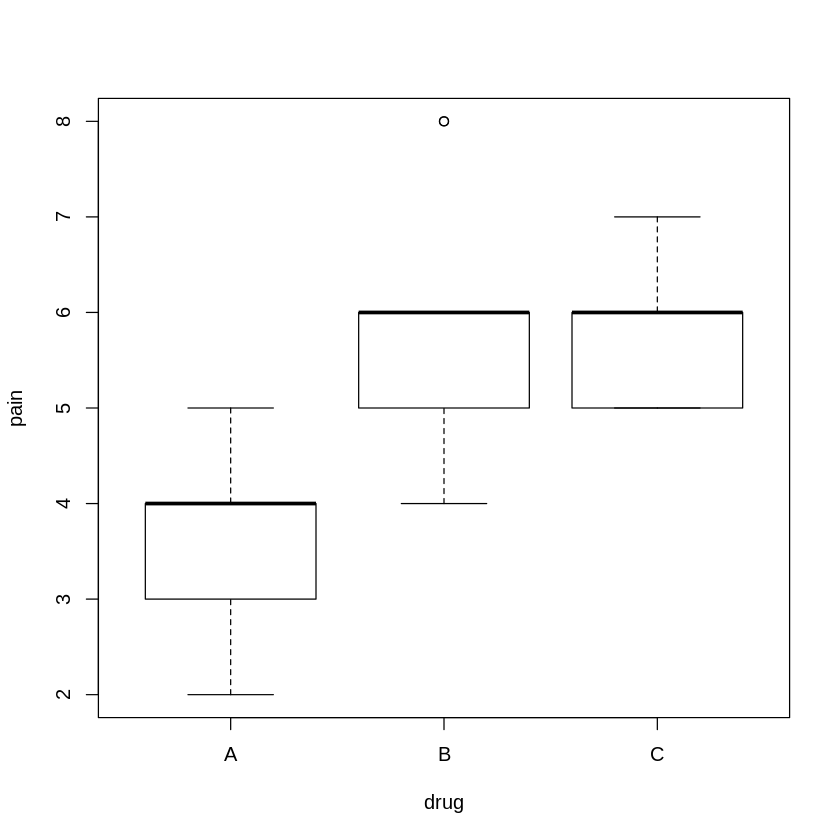

In [209]:
plot(pain ~ drug, data = migraine)

From the boxplots it appears that the mean pain for drug A is lower than that for drugs B and C.

Next, the R function aov() can be used for fitting ANOVA models.

In [210]:
results = aov(pain ~ drug, data = migraine)

In [211]:
summary(results)

            Df Sum Sq Mean Sq F value   Pr(>F)    
drug         2  28.22  14.111   11.91 0.000256 ***
Residuals   24  28.44   1.185                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Studying the output of the **ANOVA** table above we see that the F-statistic is 11.91 with a p-value equal to 0.0003.

We clearly reject the null hypothesis of equal means for all three drug groups.

The ANOVA F-test answers the question whether there are significant differences in the K population means. 

However, it does not provide us with any information about how they differ. 

Therefore when you reject H 0 in ANOVA, additional analyses are required to determine what is driving the difference in means.

**Multiple comparisons procedure is Tukey‟s method (a.k.a.Tukey's Honest Significance Test). **

The function TukeyHSD() creates a set of confidence intervals on the differences between means with the specified family-wise probability of coverage. 

The general form is
>TukeyHSD(x, conf.level = 0.95)

Here x is a fitted model object (e.g., an aov fit) and conf.level is the confidence level.

In [212]:
TukeyHSD(results, conf.level = 0.95)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = pain ~ drug, data = migraine)

$drug
         diff        lwr      upr     p adj
B-A 2.1111111  0.8295028 3.392719 0.0011107
C-A 2.2222222  0.9406139 3.503831 0.0006453
C-B 0.1111111 -1.1704972 1.392719 0.9745173


These results show that the B-A and C-A differences are significant

(p=0.0011 and p=0.00065, respectively), 

while the C-B difference is not(p=0.97).

### Two-Way ANOVA

Two-way **ANOVA** is used to compare the means of populations that are classified in two different ways, or the mean responses in an experiment with two factors. 

We fit two-way **ANOVA** models in R using the function **aov()**.
> aov(Response~ FactorA+ FactorB)

fits a two-way ANOVA model without interactions.

Here both Factor A and Factor B are categorical variables, while Response is quantitative.

### Problem: 
A tea company appoints four salesmen A, B, C and D and observes their sales in three seasons – summer, winter and monsoon.

The figures (in lakhs) of sales are given in the following table:
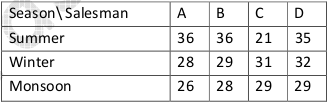

i) Do the salesmen significantly differ in performance?

ii) Is there significant difference between the seasons?

In [213]:
sales = c(36,36,21,35,28,29,31,32,26,28,29,29)

In [214]:
f1 = c(rep(1:3, rep(4,3)))

In [215]:
f2 = rep(c("A","B","C","D"),3)

In [216]:
season = factor(f1)

In [217]:
salesmen = factor(f2)

In [218]:
ans = aov(sales~ season + salesmen)

In [219]:
summary(ans)

            Df Sum Sq Mean Sq F value Pr(>F)
season       2     32   16.00   0.706  0.531
salesmen     3     42   14.00   0.618  0.629
Residuals    6    136   22.67               

### Since p-value > LOS for both factors season and salesmen, therefore H 0 is accepted.
    Salesmen do not differ significantly in their performance and also there is no significant difference between seasons.